<a href="https://colab.research.google.com/github/nedokormysh/Stepik_Competitive_DS/blob/week_2/Competitive_ML3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
rides_info = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/rides_info.csv")
cars = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_train.csv")

In [ ]:
path = 'https://stepik.org/media/attachments/lesson/779914/make_it_easy.csv'
df = pd.read_csv(path)

In [ ]:
df

,feature_1,feature_2,feature_3,label
0,2.5,0.00,58,B
1,2.5,0.02,61,B
2,2.5,0.05,33,B
3,2.5,0.07,89,B
4,2.5,0.10,58,B
...,...,...,...,...
1253,2.0,-0.09,30,A
1254,2.0,-0.07,41,A
1255,2.0,-0.05,30,A
1256,2.0,-0.03,3,A


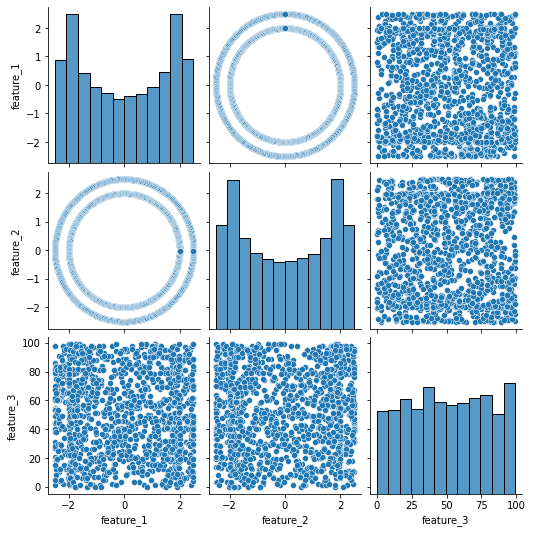

In [ ]:
sns.pairplot(df)

In [ ]:
df['killer_feature'] = df['feature_2']/df['feature_1']
df

,feature_1,feature_2,feature_3,label,killer_feature
0,2.5,0.00,58,B,0.000
1,2.5,0.02,61,B,0.008
2,2.5,0.05,33,B,0.020
3,2.5,0.07,89,B,0.028
4,2.5,0.10,58,B,0.040
...,...,...,...,...,...
1253,2.0,-0.09,30,A,-0.045
1254,2.0,-0.07,41,A,-0.035
1255,2.0,-0.05,30,A,-0.025
1256,2.0,-0.03,3,A,-0.015


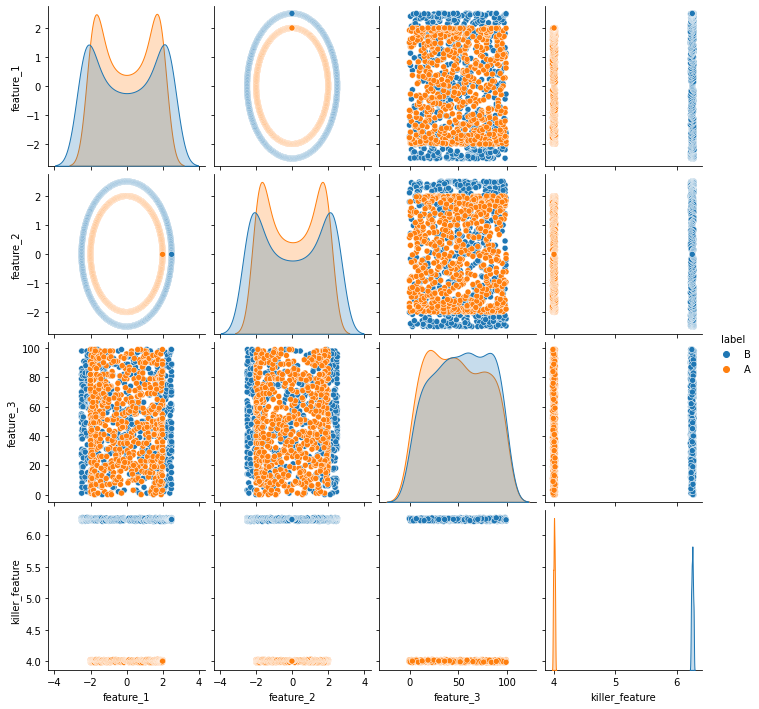

In [ ]:
df['killer_feature'] = (df['feature_1'] ** 2 + df['feature_2'] ** 2)
sns.pairplot(df, hue='label')

# 3.2.9

In [ ]:
path = 'https://raw.githubusercontent.com/nedokormysh/Stepik_Competitive_DS/week_2/make_gold_features.csv'
df = pd.read_csv(path)

In [ ]:
df

,car_id,ride_date,deviation_normal,target_class
0,b12101843B,2020-01-01,-2.846,engine_ignition
1,b12101843B,2020-01-02,-2.431,engine_ignition
2,b12101843B,2020-01-03,-5.992,engine_ignition
3,b12101843B,2020-01-04,-3.427,engine_ignition
4,b12101843B,2020-01-05,-6.351,engine_ignition
...,...,...,...,...
6895,C14604474J,2020-03-28,24.981,engine_ignition
6896,C14604474J,2020-03-29,30.294,engine_ignition
6897,C14604474J,2020-03-30,26.085,engine_ignition
6898,C14604474J,2020-03-31,22.812,engine_ignition


In [ ]:
# df.info()

In [ ]:
df = df.append({'car_id': 'C14604474J', 'ride_date': '2020-04-01', 'deviation_normal': 25, 'target_class':'engine_ignition'},ignore_index=True)
df

,car_id,ride_date,deviation_normal,target_class
0,b12101843B,2020-01-01,-2.846,engine_ignition
1,b12101843B,2020-01-02,-2.431,engine_ignition
2,b12101843B,2020-01-03,-5.992,engine_ignition
3,b12101843B,2020-01-04,-3.427,engine_ignition
4,b12101843B,2020-01-05,-6.351,engine_ignition
...,...,...,...,...
6897,C14604474J,2020-03-30,26.085,engine_ignition
6898,C14604474J,2020-03-31,22.812,engine_ignition
6899,C14604474J,2020-04-01,26.519,engine_ignition
6900,C14604474J,2020-04-01,25.000,engine_ignition


In [ ]:
# len(df[df['car_id'] == 'b12101843B']['ride_date'].unique())

In [ ]:
# rides_info = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/rides_info.csv")
# cars = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_train.csv")
# driver_info = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/driver_info.csv')

# rides_info = rides_info.merge(cars, on="car_id", how="right")
# rides_info = rides_info.merge(driver_info, on="user_id", how="left")

In [ ]:
# for index in range(len(df)):
#   len(df[df['car_id'] == index]['ride_date'].unique())
f = [len(df[df['car_id'] == index]['ride_date'].unique()) for index in range(len(df))]
len(f)

6902

In [ ]:
# rides_info.head(3)

In [ ]:
# g = sns.relplot(
#     data=df,
#     x="ride_date",
#     y="deviation_normal",
#     hue="target_class",
#     kind="line",  # или scatter
#     aspect=4,
# )

# g.set_xticklabels(rotation=45, horizontalalignment="right", step=2);

In [ ]:
df_grouped = df.groupby(by=['car_id', 'ride_date']).agg(dev_norm_mean = ('deviation_normal', 'mean'))
df_grouped

dev_norm_mean
car_id     ride_date                
B-8479157Q 2020-01-01          2.666
           2020-01-02         -2.220
           2020-01-03          3.595
           2020-01-04          5.600
           2020-01-05          4.595
...                              ...
x40724550Q 2020-03-28        -14.450
           2020-03-29        -14.790
           2020-03-30        -15.131
           2020-03-31        -15.471
           2020-04-01        -15.811

[6900 rows x 1 columns]

In [ ]:
df_m = df.merge(df_grouped, on=['car_id','ride_date'], how='inner')
df_m

,car_id,ride_date,deviation_normal,target_class,dev_norm_mean
0,b12101843B,2020-01-01,-2.846,engine_ignition,-2.846000
1,b12101843B,2020-01-02,-2.431,engine_ignition,-2.431000
2,b12101843B,2020-01-03,-5.992,engine_ignition,-5.992000
3,b12101843B,2020-01-04,-3.427,engine_ignition,-3.427000
4,b12101843B,2020-01-05,-6.351,engine_ignition,-6.351000
...,...,...,...,...,...
6897,C14604474J,2020-03-30,26.085,engine_ignition,26.085000
6898,C14604474J,2020-03-31,22.812,engine_ignition,22.812000
6899,C14604474J,2020-04-01,26.519,engine_ignition,25.506333
6900,C14604474J,2020-04-01,25.000,engine_ignition,25.506333


In [ ]:
df_m.drop_duplicates(subset=['car_id', 'ride_date'], inplace=True)
df_m

,car_id,ride_date,deviation_normal,target_class,dev_norm_mean
0,b12101843B,2020-01-01,-2.846,engine_ignition,-2.846000
1,b12101843B,2020-01-02,-2.431,engine_ignition,-2.431000
2,b12101843B,2020-01-03,-5.992,engine_ignition,-5.992000
3,b12101843B,2020-01-04,-3.427,engine_ignition,-3.427000
4,b12101843B,2020-01-05,-6.351,engine_ignition,-6.351000
...,...,...,...,...,...
6895,C14604474J,2020-03-28,24.981,engine_ignition,24.981000
6896,C14604474J,2020-03-29,30.294,engine_ignition,30.294000
6897,C14604474J,2020-03-30,26.085,engine_ignition,26.085000
6898,C14604474J,2020-03-31,22.812,engine_ignition,22.812000


In [ ]:
df_m.duplicated(['car_id', 'ride_date'])

0       False
1       False
2       False
3       False
4       False
        ...  
6896    False
6897    False
6898    False
6899    False
6900     True
Length: 6901, dtype: bool

In [ ]:
df.iloc[0, :]

car_id                   b12101843B
ride_date                2020-01-01
deviation_normal             -2.846
target_class        engine_ignition
Name: 0, dtype: object

In [ ]:
df_m.duplicated().iloc[0]

False

In [ ]:
for i in range(len(df_m)):
  if df_m.duplicated().iloc[i] == True:    
    df_m.drop(i, axis=0)

In [ ]:
df_m

,car_id,ride_date,deviation_normal,target_class,dev_norm_mean
0,b12101843B,2020-01-01,-2.846,engine_ignition,-2.846000
1,b12101843B,2020-01-02,-2.431,engine_ignition,-2.431000
2,b12101843B,2020-01-03,-5.992,engine_ignition,-5.992000
3,b12101843B,2020-01-04,-3.427,engine_ignition,-3.427000
4,b12101843B,2020-01-05,-6.351,engine_ignition,-6.351000
...,...,...,...,...,...
6895,C14604474J,2020-03-28,24.981,engine_ignition,24.981000
6896,C14604474J,2020-03-29,30.294,engine_ignition,30.294000
6897,C14604474J,2020-03-30,26.085,engine_ignition,26.085000
6898,C14604474J,2020-03-31,22.812,engine_ignition,22.812000


In [ ]:
# df_m[df_m['car_id'] == 'b12101843B']. head(10)

## Общее решение.

In [ ]:
df_pivot = df_m.pivot_table(index='ride_date', columns=['car_id'], values='dev_norm_mean')
df_pivot

car_id,B-8479157Q,C14604474J,D46039134C,E-1571710h,F51416137Z,G-2990262b,G11530237Q,H72631192M,J-1113742S,J20066002Q,...,r-4232284g,s-1795135b,t87727056H,v10840367M,v88691914J,w-7960339R,w21325307E,x-8934991u,x30389932l,x40724550Q
ride_date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,2.666,0.828000,0.672,1.144,-0.832,2.090,-0.308,3.914,1.914,-0.012,...,0.000,4.004,-0.256,1.347,-3.512,-0.359,0.000,1.169,3.477,0.000
2020-01-02,-2.220,0.406000,-0.255,-7.498,-6.580,-1.107,-5.666,2.699,-0.172,0.475,...,0.000,2.333,2.376,1.640,-7.282,-2.561,0.000,3.583,6.932,0.000
2020-01-03,3.595,-0.714000,-3.983,-6.645,-6.182,0.360,-6.684,5.929,2.933,-1.205,...,0.000,5.088,2.472,2.258,-3.353,-6.742,0.000,4.546,11.859,0.000
2020-01-04,5.600,0.159000,-3.780,-4.945,-4.211,-1.788,-4.097,8.306,3.383,-5.195,...,0.000,6.303,7.184,1.851,-4.973,-11.150,0.000,3.927,5.149,0.000
2020-01-05,4.595,1.095000,-0.378,-2.494,-2.377,-0.311,-5.056,8.779,1.936,-6.349,...,0.000,5.456,5.312,2.382,-6.581,-10.693,0.000,5.589,0.545,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-28,50.603,24.981000,-1.761,37.024,-12.563,31.316,41.949,20.604,9.209,-2.259,...,-13.771,22.829,18.417,47.999,-14.208,-19.105,-13.768,45.559,36.061,-14.450
2020-03-29,49.543,30.294000,-3.777,37.512,-13.612,36.472,40.710,18.278,9.199,0.273,...,-14.111,16.834,14.911,47.440,-13.493,-15.817,-14.108,43.042,39.861,-14.790
2020-03-30,48.658,26.085000,-1.543,39.820,-9.703,37.194,41.567,22.452,8.096,-1.404,...,-14.450,15.449,9.476,46.718,-14.314,-17.225,-14.278,45.158,33.610,-15.131


In [ ]:
# df_pivot.columns

In [ ]:
result = pd.DataFrame(columns=['car_id', 'gold_feature_1', 'gold_feature_2'])
result

,car_id,gold_feature_1,gold_feature_2


In [ ]:
# list(df_pivot.columns)

In [ ]:
for col in (df_pivot.columns):
  print(col)
  max = 0
  for row in df_pivot.index:
    print(df_pivot.loc[row, col])

In [ ]:
df_pivot['B-8479157Q']

ride_date
2020-01-01     2.666
2020-01-02    -2.220
2020-01-03     3.595
2020-01-04     5.600
2020-01-05     4.595
               ...  
2020-03-28    50.603
2020-03-29    49.543
2020-03-30    48.658
2020-03-31    49.425
2020-04-01    45.395
Name: B-8479157Q, Length: 92, dtype: float64

In [ ]:
max = 0
for i in df_pivot['B-8479157Q'].index:
  # print(i)
  print(df_pivot['B-8479157Q'][i])
  # if (df_pivot['B-8479157Q'][i + 1] - df_pivot['B-8479157Q'][i]):
  #   max = (df_pivot['B-8479157Q'][i + 1] - df_pivot['B-8479157Q'][i])

In [ ]:


pos_ = 0
max = 0
for i in range(len(df_pivot['B-8479157Q'].index) - 1):
# for i in range(3):
  pos_ += 1
  # print(df_pivot['B-8479157Q'].iloc[i])
  # print(df_pivot['B-8479157Q'].iloc[i + 1])
  # print(df_pivot['B-8479157Q'][i])
  # print(df_pivot['B-8479157Q'][i + 1])
  max_ = abs(df_pivot['B-8479157Q'][i + 1] - df_pivot['B-8479157Q'][i])
  # print('max_', max_)
  if max_ > max and max_ > 5:
    max = max_
    pos = pos_

max, pos

(7.773000000000003, 58)

In [ ]:
49.425-45.395

4.029999999999994

In [ ]:
for col in df_pivot:
  print(col)
  pos_ = 0
  max = 0

  for i in range(len(df_pivot[col].index) - 1):
    pos_ += 1
    max_ = abs(df_pivot[col][i + 1] - df_pivot[col][i])
    # print('max_', max_)
    if max_ > max and max_ > 5:
      max = max_
      pos = pos_

  print(max, pos)

In [ ]:
df_grouped = df.groupby(by=['car_id', 'ride_date']).agg(dev_norm_mean = ('deviation_normal', 'mean'))
df_m = df.merge(df_grouped, on=['car_id','ride_date'], how='inner')
df_m.drop_duplicates(subset=['car_id', 'ride_date'], inplace=True)

df_pivot = df_m.pivot_table(index='ride_date', columns=['car_id'], values='dev_norm_mean')
result = pd.DataFrame(columns=['car_id', 'gold_feature_1', 'gold_feature_2'])

for col in df_pivot:
  # print(col)
  pos_ = 0
  max = 0

  for i in range(len(df_pivot[col].index) - 1):
    pos_ += 1
    max_ = abs(df_pivot[col][i + 1] - df_pivot[col][i])
    
    if max_ > max and max_ > 5:
      max = max_
      pos = pos_


  result = result.append({'car_id': col, 'gold_feature_1': max, 'gold_feature_2': pos}, ignore_index=True)
  result.set_index('car_id')
result

,car_id,gold_feature_1,gold_feature_2
0,B-8479157Q,7.773,58
1,C14604474J,20.931,50
2,D46039134C,18.446,48
3,E-1571710h,26.922,53
4,F51416137Z,43.798,49
...,...,...,...
70,w-7960339R,33.390,53
71,w21325307E,0.000,53
72,x-8934991u,9.702,16
73,x30389932l,20.404,50


In [ ]:
# Усредняем значений за один день и выбрасываем дубли дат для каждой машины
cols = ["car_id", "ride_date"]
df["value"] = df.groupby(cols, as_index=False)["deviation_normal"].transform("mean")
df = df.drop_duplicates(subset=["car_id", "ride_date"]).copy()

# Считаем измененя для каждого дня и зануляем все, что меньше 5
df["diff_value"] = df.groupby("car_id", as_index=False)["value"].transform(pd.Series.diff)
df["diff_value"] = df["diff_value"].apply(lambda x: x if x >= 5 else 0)

# Группировкой получаем максмальное изменение и его позицию 
f = lambda x: np.argmax(x)
result = df.groupby("car_id", as_index=False).agg(
    gold_feature_1=("diff_value", "max"),
    gold_feature_2=("diff_value", f),
)

0         NaN
1       0.415
2      -3.561
3       2.565
4      -2.924
        ...  
6895    0.442
6896    5.313
6897   -4.209
6898   -3.273
6899    3.707
Name: diff_value, Length: 6900, dtype: float64

# 3.2.11

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

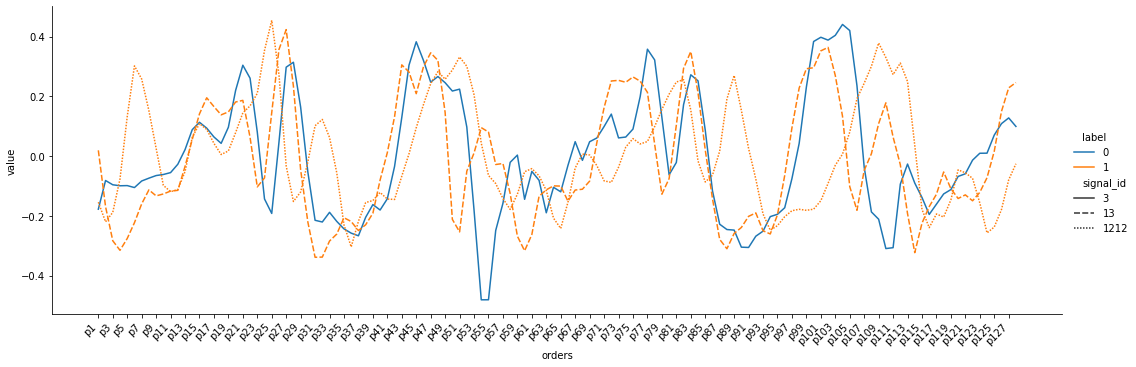

In [ ]:
# path = 'https://stepik.org/media/attachments/lesson/779914/fen_train.csv'
path = 'https://raw.githubusercontent.com/nedokormysh/Stepik_Competitive_DS/week_2/fen/fen_train.csv'
train = pd.read_csv(path)

# Переводим датасет в long формат
df_melt = train.melt(
    id_vars="signal_id",
    value_vars=[f"p{i}" for i in range(1, 128 + 1)],
    var_name="orders",
    value_name="value",
).merge(train[["signal_id", "label"]], on="signal_id", how="left")

# Отбираем несколько примеров разных классов
tmp = df_melt[df_melt.signal_id.isin([
                                      3,
                                      13,
                                      #16,
                                      1212
                                      ])]

# Строим графику
sns.relplot(
    data=tmp,
    x="orders",
    y="value",
    hue="label",
    style="signal_id",
    kind="line",
    aspect=3,
).set_xticklabels(rotation=45, horizontalalignment="right", step=2);

In [ ]:
# tmp

In [ ]:
train.head()

,signal_id,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p120,p121,p122,p123,p124,p125,p126,p127,p128,label
0,3,-0.177789,-0.081874,-0.096131,-0.099436,-0.098867,-0.105427,-0.083472,-0.074000,-0.065275,...,-0.068265,-0.059327,-0.013739,0.009359,0.009645,0.070163,0.108443,0.127638,0.099169,0
1,4,0.010337,0.010733,0.117607,0.259589,0.339589,0.329296,0.281260,0.115658,-0.172955,...,0.370135,0.344097,0.158927,-0.102145,-0.301141,-0.148649,0.263631,0.480440,0.420327,0
2,5,-0.221846,-0.247773,-0.187847,-0.181616,-0.108799,-0.099480,-0.083244,-0.054944,-0.100919,...,-0.086089,-0.080394,-0.089625,-0.122950,-0.074273,-0.018595,0.054752,0.097544,0.067837,0
3,6,0.411835,0.513823,0.558802,0.380244,0.210830,0.174093,0.102772,-0.051933,-0.237179,...,0.113856,0.014483,-0.112094,-0.133700,-0.024104,-0.042590,-0.062838,-0.078137,-0.194478,0
4,7,0.221770,-0.026863,-0.249447,-0.340728,-0.288676,-0.207364,-0.155768,-0.091768,-0.119012,...,-0.216549,-0.167078,-0.077491,-0.115439,-0.126838,-0.087323,-0.115734,-0.102995,-0.098657,0


In [ ]:
tr = train.copy(())
tr.drop('label', inplace=True, axis=1)
tr.set_index('signal_id', inplace=True)

In [ ]:
# col_need = [col for col in tr.columns if re.match('p', col)]

In [ ]:
# col_need

In [ ]:
# col_need = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11',
#             'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21',
#             'p22', 'p23', 'p24', 'p25', 'p26', 'p27', 'p28', 'p29', 'p30', 'p31',
#             'p32', 'p33', 'p34', 'p35', 'p36', 'p37', 'p38', 'p39', 'p40', 'p41',
#             'p42', 'p43', 'p44', 'p45', 'p46', 'p47', 'p48', 'p49', 'p50', 'p51',
#             'p52', 'p53', 'p54', 'p55', 'p56', 'p57', 'p58', 'p59', 'p60', 'p61',
#             'p62', 'p63', 'p64', 'p65', 'p66', 'p67', 'p68', 'p69', 'p70', 'p71',
#             'p72', 'p73', 'p74', 'p75', 'p76', 'p77', 'p78', 'p79', 'p80', 'p81',
#             'p82', 'p83', 'p84', 'p85', 'p86', 'p87', 'p88', 'p89', 'p90', 'p91',
#             'p92', 'p93', 'p94', 'p95', 'p96', 'p97', 'p98', 'p99', 'p100', 'p101',
#             'p102', 'p103', 'p104', 'p105', 'p106', 'p107', 'p108', 'p109', 'p110',
#             'p111', 'p112', 'p113', 'p114', 'p115', 'p116', 'p117', 'p118', 'p119',
#             'p120', 'p121', 'p122', 'p123', 'p124', 'p125', 'p126', 'p127', 'p128']

In [ ]:
# for col in tr.columns:
#   tr[f'{col}_diff'] = abs(tr[col].diff())
#   # tr[f'{col}_diff'] = tr[col].diff

In [ ]:
# tr = abs(tr.diff(axis=1))
# tr

In [ ]:
# tr.columns = [f'{i}_diff' for i in tr.columns]

In [ ]:
# tr

In [ ]:
# # n = 5
# # f = lambda x: x if x >= 5 else 0
# # tr.drop('p1_diff', axis=1)
# tr = tr.applymap(lambda x: x if x >= 0.05 else 0)
# tr

In [ ]:
# tr

In [ ]:
# np.count_nonzero(tr, axis=0)

In [ ]:
# tr.columns

In [ ]:
# # tr_piv = tr.pivot_table(index=list(tr.columns), columns=tr.index)
# tr_piv = tr.pivot_table(index=tr.p1_diff, columns=tr.index)
# tr_piv

In [ ]:
train.head()

,signal_id,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p120,p121,p122,p123,p124,p125,p126,p127,p128,label
0,3,-0.177789,-0.081874,-0.096131,-0.099436,-0.098867,-0.105427,-0.083472,-0.074000,-0.065275,...,-0.068265,-0.059327,-0.013739,0.009359,0.009645,0.070163,0.108443,0.127638,0.099169,0
1,4,0.010337,0.010733,0.117607,0.259589,0.339589,0.329296,0.281260,0.115658,-0.172955,...,0.370135,0.344097,0.158927,-0.102145,-0.301141,-0.148649,0.263631,0.480440,0.420327,0
2,5,-0.221846,-0.247773,-0.187847,-0.181616,-0.108799,-0.099480,-0.083244,-0.054944,-0.100919,...,-0.086089,-0.080394,-0.089625,-0.122950,-0.074273,-0.018595,0.054752,0.097544,0.067837,0
3,6,0.411835,0.513823,0.558802,0.380244,0.210830,0.174093,0.102772,-0.051933,-0.237179,...,0.113856,0.014483,-0.112094,-0.133700,-0.024104,-0.042590,-0.062838,-0.078137,-0.194478,0
4,7,0.221770,-0.026863,-0.249447,-0.340728,-0.288676,-0.207364,-0.155768,-0.091768,-0.119012,...,-0.216549,-0.167078,-0.077491,-0.115439,-0.126838,-0.087323,-0.115734,-0.102995,-0.098657,0


тестируем новую функцию.



In [ ]:
tr = train.copy()
tr_labeled = tr[['signal_id', 'label']]
tr_work = tr.drop('label', axis=1)
tr_work.set_index('signal_id', inplace=True)
tr_work['std_of_signal'] = tr_work.std(axis=1)
popped_col_std = tr_work.pop('std_of_signal')
tr_work = abs(tr_work.diff(axis=1))
col_need = [f'p{i}' for i in range(2, 129)]

def foo(x, n=0.05):
  return x if x >= n else 0
  
tr_work = tr_work.applymap(foo)
tr_work['std_of_diff'] = tr_work.std(axis=1)

all_std=[]
for i in tr_work.index:   
  std = 0
  s_lst = []
  for el in col_need:
    if tr_work.loc[i][el] != 0:
      s_lst.append(tr_work.loc[i][el])
  std = np.std(s_lst)
  all_std.append(std)

tr_work['std_of_diff_f'] = all_std

tr_work['count_zero'] = tr_work.eq(0).sum(axis=1) - 1
tr_work['percent_of_zeroes'] = (tr_work['count_zero'] * 100) / 127
tr_work['std_of_signal'] = popped_col_std

# c_lst = []
# for i in tr_work.index:
#   c = 0  
#   for j in range(len(tr_work.loc[i].sort_values(ascending=False)) - 1):
#     if ((tr_work.loc[i].sort_values(ascending=False)[j + 1]) != 0):
#       if (tr_work.loc[i].sort_values(ascending=False)[j + 1]) - (tr_work.loc[i].sort_values(ascending=False)[j] <= 0.005):
#         c += 1
#   c_lst.append(c)

# tr_work['count_of_equal'] = c_lst


tr_work.reset_index(inplace=True)


tr_merge = tr_work.merge(tr_labeled, on='signal_id')
tr_merge.set_index('signal_id', inplace=True)
tr_merge = tr_merge[['std_of_diff', 'std_of_diff_f', 'count_zero',	'percent_of_zeroes',	'std_of_signal',	
                    #  'count_of_equal',
                     'label']]

# tr_work.head()
# tr_merge.head()

# sns.scatterplot(data=tr_merge, x='count_zero', y='count_of_equal', hue='label')
sns.scatterplot(data=tr_merge, x='std_of_diff_f', y='percent_of_zeroes', hue='label')

,std_of_diff,std_of_diff_f,count_zero,percent_of_zeroes,std_of_signal,label
signal_id,,,,,,
3,0.080597,0.065036,70,55.118110,0.201643,0
4,0.104867,0.093960,48,37.795276,0.239616,0
5,0.078553,0.067396,66,51.968504,0.219042,0
6,0.083737,0.067096,56,44.094488,0.248920,0
7,0.069428,0.058224,68,53.543307,0.195233,0


In [ ]:
# tr_work.loc[3].value_counts()

In [ ]:
tr_merge.head(1)

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p125,p126,p127,p128,std_of_diff,count_zero,percent_of_zeroes,std_of_signal,count_of_equal,label
signal_id,,,,,,,,,,,,,,,,,,,,,
3,0,0.095915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.082363,82,64.566929,0.201643,49,0


<AxesSubplot:xlabel='std_of_diff_f', ylabel='percent_of_zeroes'>

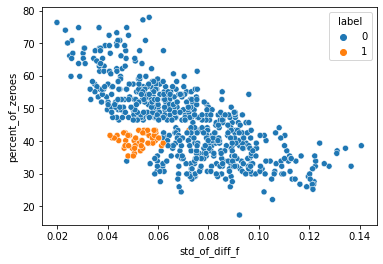

In [ ]:
sns.scatterplot(data=tr_merge, x='std_of_diff_f', y='percent_of_zeroes', hue='label')

In [ ]:
# tr_work['count_of_equal'] = c_lst

In [ ]:
# tr_work

In [ ]:
# c_lst = []
# for i in tr_work.index:
#   # print(i)
#   c = 0
#   # print(tr_work.loc[i].sort_values(ascending=False)[i])
#   for j in range(len(tr_work.loc[i].sort_values(ascending=False)) - 1):
#     if ((tr_work.loc[i].sort_values(ascending=False)[j + 1]) != 0):
#       if (tr_work.loc[i].sort_values(ascending=False)[j + 1]) - (tr_work.loc[i].sort_values(ascending=False)[j] <= 0.005):
#         c += 1
#   c_lst.append(c)

# c_lst

In [ ]:
# tr_work.loc[3].sort_values(ascending=False)

In [ ]:
# c = 0
# for i in range(len(tr_work.loc[3].sort_values(ascending=False))-1):
#   # print(tr_work.loc[3].sort_values(ascending=False)[i])

#   if ((tr_work.loc[3].sort_values(ascending=False)[i + 1]) != 0):
#     if (tr_work.loc[3].sort_values(ascending=False)[i + 1]) - (tr_work.loc[3].sort_values(ascending=False)[i] <= 0.005):
#                                                                                                                             c += 1
# c                                                                                                                       

In [ ]:
# tr_work['Zero_Count'] = tr_work.eq(0).sum(axis=1)
# tr_work

<AxesSubplot:xlabel='count_zero', ylabel='std_of_signal'>

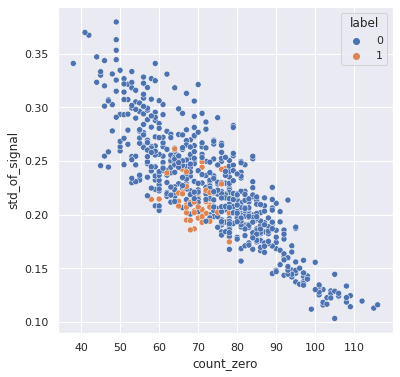

In [ ]:
tr = train.copy()
tr_labeled = tr[['signal_id', 'label']]
tr_work = tr.drop('label', axis=1)
tr_work.set_index('signal_id', inplace=True)
tr_work['std_of_signal'] = tr_work.std(axis=1)
tr_work
# tr_work['var_of_signal'] = tr_work.var(axis=1)
popped_col_std = tr_work.pop('std_of_signal')
# popped_col_var = tr_work.pop('var_of_signal')
tr_work = abs(tr_work.diff(axis=1))
tr_work

# tr_work = abs(tr_work[col_need].diff(axis=1))
# tr_work.columns = [f'{i}_diff' for i in tr_work.columns]
def foo(x, n=0.07):
  return x if x >= n else 0
  
tr_work = tr_work.applymap(foo)
# tr_work

tr_work['count_zero'] = tr_work.isin([0]).sum(axis=1) - 1
# tr_work['Zero_Count'] = tr_work.eq(0).sum(axis=1)
# tr_work
tr_work['std_of_diff'] = tr_work.std(axis=1)
# tr_work['mean_of_diff'] = tr_work.mean(axis=1)
tr_work['std_of_signal'] = popped_col_std
# # tr_work['var_of_signal'] = popped_col_var
# tr_work
# tr_work = tr_work[['std_of_signal', 
#                   #  'var_of_signal',
#                    'count_zero', 'std_of_diff', 'mean_of_diff', ]]
tr_work.reset_index(inplace=True)
# tr_work

tr_merge = tr_labeled.merge(tr_work, on='signal_id')
tr_merge.set_index('signal_id', inplace=True)
tr_merge

# # # # sns.scatterplot(data=tr_merge, x='mean_of_diff', y='count_zero', hue='label')
# sns.set(rc={"figure.figsize":(6, 6)})
sns.scatterplot(data=tr_merge, x='count_zero', y='std_of_signal', hue='label')

In [ ]:
# (tr_work == 0).astype(int).sum(axis=1)

In [ ]:
# c = 0
# for el in list(tr_work.iloc[3]):
#    if el == 0:
#      c += 1
# c

In [ ]:
# tr_work.loc[3].value_counts()

In [ ]:
# from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #, mean_squared_error 

In [ ]:
# dict_map={1: 'label_1', 0:'label_0'}

# tr_merge.label.replace(dict_map, inplace=True)
# tr_merge

In [ ]:
# sns.pairplot(tr_merge, hue='label')

In [ ]:
X = tr_merge.iloc[:, :-1]
# X
y = tr_merge['label']
# y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7575)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=40)
neigh.fit(X_train, y_train)

accuracy_score(y_true=y_test, y_pred=neigh.predict(X_test))

0.9137055837563451

In [ ]:
y_test.value_counts()

0    197
Name: p1, dtype: int64

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_true=y_test, y_score=neigh.predict(X_test))

0.5

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42, verbose=False, max_depth=400, max_leaves=5)

xgb_model.fit(X_train, y_train)

[10:41:09] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=400, max_leaves=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
accuracy_score(y_true=y_test, y_pred=xgb_model.predict(X_test))

0.9949238578680203

In [ ]:
roc_auc_score(y_true=y_test, y_score=xgb_model.predict(X_test))

0.9972222222222222

In [ ]:
# sns.scatterplot(data=tr_merge, x='mean', y='std', hue='label')

In [ ]:
# sns.relplot(
#     data=tr_merge,
#     x="count_zero",
#     y="std",
#     hue="label",
#     style="signal_id",
#     kind="scatter",
#     aspect=3,
# )
# # .set_xticklabels(rotation=45, horizontalalignment="right", step=2);

In [ ]:
sns.scatterplot(data=tr_work, x='count_zero', y='std', style='signal_id')

In [ ]:
tr_work.loc[3].p1_diff

0.0

In [ ]:
tr_work.isin([0]).sum(axis=1)

signal_id
3       71
4       49
5       67
6       57
7       69
        ..
1214    48
1218    96
1219    70
1221    42
1222    47
Length: 654, dtype: int64

for test

In [ ]:
path = 'https://raw.githubusercontent.com/nedokormysh/Stepik_Competitive_DS/week_2/fen/fen_test.csv'
test = pd.read_csv(path)
test

,signal_id,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p119,p120,p121,p122,p123,p124,p125,p126,p127,p128
0,0,0.048383,0.075671,0.085861,0.087598,0.133466,0.239305,0.324572,0.264262,0.129173,...,0.138940,0.256082,0.344688,0.252258,0.034918,-0.141454,-0.132326,0.092708,0.290870,0.305827
1,1,0.092534,0.209535,0.390794,0.442508,0.429571,0.451524,0.310780,-0.075440,-0.297661,...,0.187563,0.234320,0.270503,0.328785,0.347625,0.426766,0.299061,-0.060183,-0.177051,-0.083738
2,8,0.045240,0.182892,0.293203,0.367133,0.341595,0.315698,0.343855,0.301613,0.243359,...,0.368040,0.290899,0.207095,0.242306,0.259203,0.210387,0.212587,0.076684,-0.203899,-0.346122
3,9,0.182414,-0.337581,-0.080484,0.393137,0.373783,0.112220,-0.219613,-0.355965,-0.302890,...,0.127023,0.275310,0.192306,0.073698,0.243584,0.276032,0.238793,0.275950,0.256591,0.360451
4,10,0.378236,0.137916,-0.063737,-0.201264,-0.067326,0.127712,0.221648,0.257548,0.093588,...,-0.202586,0.001186,0.190594,0.253443,0.168408,0.025194,-0.048555,-0.190483,-0.387497,-0.387843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,1216,-0.271647,-0.279556,-0.261024,-0.240678,-0.198738,-0.050845,0.187136,0.400810,0.466261,...,0.432804,0.430316,0.360257,0.128453,-0.081609,-0.308643,-0.311576,-0.065489,-0.087348,-0.105786
428,1217,0.437164,0.127592,-0.304225,-0.488055,-0.278895,-0.020672,0.125794,0.113607,-0.144910,...,0.460892,0.331173,-0.004532,-0.298237,-0.354807,-0.211790,-0.045861,0.074650,0.046221,-0.131905
429,1223,-0.133246,-0.132675,-0.155113,-0.079316,-0.035889,0.006239,0.001766,-0.040629,0.009979,...,-0.123037,-0.088129,-0.046241,-0.026337,0.024571,0.029573,0.044202,0.117704,0.276104,0.383572
430,1224,-0.126366,-0.189592,-0.112701,-0.136277,-0.137174,-0.033034,0.029840,0.017674,-0.019952,...,-0.038111,-0.028967,-0.025562,-0.046228,-0.069375,-0.064908,-0.053884,-0.005577,0.110611,0.214029


In [ ]:
tr_test = test.copy()
tr_labeled_test = tr_test[['signal_id']]
# tr_work = tr.drop('label', axis=1)
tr_test.set_index('signal_id', inplace=True)

tr_test['std_of_signal'] = tr_test.std(axis=1)
tr_test['var_of_signal'] = tr_test.var(axis=1)

popped_col_std_tst = tr_test.pop('std_of_signal')
popped_col_var_tst = tr_test.pop('var_of_signal')
tr_test = abs(tr_test.diff(axis=1))

# tr_test
# # # tr_work = abs(tr_work[col_need].diff(axis=1))
# # # tr_work.columns = [f'{i}_diff' for i in tr_work.columns]
# # # n = 0.02
def foo(x, n=0.045):
  return x if x >= n else 0
  
tr_work_test = tr_test.applymap(foo)

tr_work_test['count_zero'] = tr_work_test.isin([0]).sum(axis=1)
tr_work_test['std_of_diff'] = tr_work_test.std(axis=1)
tr_work_test['mean_of_diff'] = tr_work_test.mean(axis=1)
tr_work_test['std_of_signal'] = popped_col_std_tst
tr_work_test['var_of_signal'] = popped_col_var_tst
tr_work_test
tr_work_test = tr_work_test[['std_of_signal', 'var_of_signal', 'count_zero', 'std_of_diff', 'mean_of_diff', ]]
tr_work_test
# tr_work.reset_index(inplace=True)


# # tr_merge = tr_labeled.merge(tr_work, on='signal_id')
# # tr_merge.set_index('signal_id', inplace=True)
# # tr_merge

,std_of_signal,var_of_signal,count_zero,std_of_diff,mean_of_diff
signal_id,,,,,
0,0.209583,0.043871,62,5.454089,0.576209
1,0.212218,0.044986,51,4.484738,0.497913
8,0.209095,0.043659,49,4.308999,0.474373
9,0.325935,0.106264,33,2.897360,0.391531
10,0.229537,0.052704,44,3.867876,0.445701
...,...,...,...,...,...
1216,0.247374,0.061187,67,5.894278,0.619919
1217,0.216152,0.046724,40,3.514937,0.424813
1223,0.211970,0.044908,57,5.013626,0.538647


In [ ]:
xgb_model.predict(tr_work_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [ ]:
sub = pd.read_csv('https://raw.githubusercontent.com/nedokormysh/Stepik_Competitive_DS/week_2/fen/fen_sample_solution.csv')
sub

,signal_id,label
0,0,0
1,1,0
2,8,0
3,9,0
4,10,0
...,...,...
427,1216,0
428,1217,0
429,1223,0
430,1224,0


In [ ]:
sub['label'] = xgb_model.predict(tr_work_test)
sub

,signal_id,label
0,0,0
1,1,0
2,8,1
3,9,0
4,10,0
...,...,...
427,1216,0
428,1217,0
429,1223,0
430,1224,0


In [ ]:
sub.to_csv("try.csv", index=False)

In [ ]:
np.std([1, 1.85, 0, 0, 0])

0.7480641683706017

# Предиктион

In [ ]:
path = 'https://raw.githubusercontent.com/nedokormysh/Stepik_Competitive_DS/week_2/fen/fen_train.csv'
train = pd.read_csv(path)
path = 'https://raw.githubusercontent.com/nedokormysh/Stepik_Competitive_DS/week_2/fen/fen_test.csv'
test = pd.read_csv(path)

In [ ]:
tr_work.iloc[0].index

Index(['signal_id', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9',
       ...
       'p123', 'p124', 'p125', 'p126', 'p127', 'p128', 'std_of_diff',
       'count_zero', 'percent_of_zeroes', 'var_of_signal'],
      dtype='object', length=133)

In [ ]:
tr_work.loc[3][0]

-0.177789

In [ ]:
tr_work.iloc[0]

signal_id             3.000000
p1                    0.000000
p2                    0.095915
p3                    0.000000
p4                    0.000000
                       ...    
p128                  0.000000
std_of_diff           0.080597
count_zero           71.000000
percent_of_zeroes    55.905512
var_of_signal         0.040660
Name: 0, Length: 133, dtype: float64

In [ ]:
len(tr_work.index)

654

In [ ]:
tr_work.loc[1222].index

Index(['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10',
       ...
       'p119', 'p120', 'p121', 'p122', 'p123', 'p124', 'p125', 'p126', 'p127',
       'p128'],
      dtype='object', length=128)

In [ ]:
len(all_std)

654

In [ ]:
[-0.177789  , -0.08187365, -0.09613079, -0.09943559, -0.0988675 ,
       -0.1054275 , -0.08347161, -0.07400023, -0.06527484, -0.06169107,
       -0.05540313, -0.02745711,  0.02146974,  0.08832644,  0.1129589 ,
        0.09344651,  0.06391297,  0.04253147,  0.096395  ,  0.2195572 ,
        0.3040285 ,  0.2605609 ,  0.08038035, -0.1435987 , -0.1920482 ,
        0.04612717,  0.297404  ,  0.3139481 ,  0.1640056 , -0.05366086,
       -0.2149793 , -0.2207077 , -0.1883274 , -0.218604  , -0.2437696 ,
       -0.2580289 , -0.2668709 , -0.2050179 , -0.1624406 , -0.180579  ,
       -0.1429546 , -0.03474693,  0.1291289 ,  0.3042896 ,  0.3824792 ,
        0.3199857 ,  0.2473686 ,  0.2661839 ,  0.2454555 ,  0.2176247 ,
        0.2238977 ,  0.09712686, -0.1803652 , -0.4811195 , -0.4810009 ,
       -0.249051  , -0.1581631 , -0.02106318,  0.0031847 , -0.1447674 ,
       -0.05137794, -0.08115241, -0.1898595 , -0.1045996 , -0.1196707 ,
       -0.03117213,  0.04811996, -0.0143408 ,  0.0478949 ,  0.06054309,
        0.09876702,  0.1403922 ,  0.0607348 ,  0.0636379 ,  0.09030433,
        0.1994886 ,  0.3576216 ,  0.3216795 ,  0.128315  , -0.06271228,
       -0.02146227,  0.1719349 ,  0.2719598 ,  0.2517338 ,  0.08696133,
       -0.1159826 , -0.2281464 , -0.2458939 , -0.2478152 , -0.3048987 ,
       -0.3059475 , -0.2682326 , -0.2513559 , -0.2026465 , -0.1948943 ,
       -0.1730388 , -0.07542059,  0.0422601 ,  0.2311566 ,  0.3833706 ,
        0.3975569 ,  0.3879895 ,  0.40396   ,  0.4404635 ,  0.4200717 ,
        0.2355537 , -0.037186  , -0.1870026 , -0.211436  , -0.3096238 ,
       -0.3066521 , -0.09401415, -0.02678637, -0.09034605, -0.1387694 ,
       -0.1954374 , -0.1611515 , -0.1267719 , -0.1121896 , -0.06826528,
       -0.05932677, -0.01373865,  0.00935899,  0.00964476,  0.07016313,
        0.1084433 ,  0.1276384 ,  0.09916918]

In [ ]:
np.std(tr_work.loc[3])

0.20085414514373584

<AxesSubplot:xlabel='std_of_diff', ylabel='count_zero'>

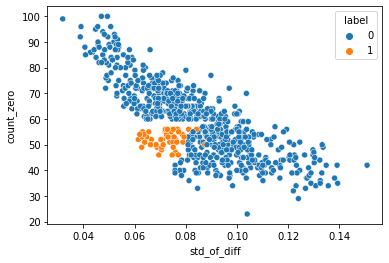

In [ ]:
tr = train.copy()
tr_labeled = tr[['signal_id', 'label']]
tr_work = tr.drop('label', axis=1)
tr_work.set_index('signal_id', inplace=True)
tr_work['std_of_signal'] = tr_work.std(axis=1)


# tr_work['std_of_signal'] = s_lst
# tr_work['var_of_signal'] = tr_work.var(axis=1)
# popped_col_std = tr_work.pop('std_of_signal')
# popped_col_var = tr_work.pop('var_of_signal')
tr_work = abs(tr_work.diff(axis=1))

def foo(x, n=0.05):
  return x if x >= n else 0
  
tr_work = tr_work.applymap(foo)
tr_work['std_of_diff'] = tr_work.std(axis=1)


tr_work['count_zero'] = tr_work.eq(0).sum(axis=1)
tr_work['percent_of_zeroes'] = (tr_work['count_zero'] * 100) / 127
tr_work['std_of_signal'] = popped_col_std
# tr_work['var_of_signal'] = popped_col_var

# c_lst = []
# for i in tr_work.index:
#   c = 0  
#   for j in range(len(tr_work.loc[i].sort_values(ascending=False)) - 1):
#     if ((tr_work.loc[i].sort_values(ascending=False)[j + 1]) != 0):
#       if (tr_work.loc[i].sort_values(ascending=False)[j + 1]) - (tr_work.loc[i].sort_values(ascending=False)[j] <= 0.005):
#         c += 1
#   c_lst.append(c)

# tr_work['count_of_equal'] = c_lst


# tr_work.reset_index(inplace=True)


tr_merge = tr_work.merge(tr_labeled, on='signal_id')
tr_merge.set_index('signal_id', inplace=True)
tr_merge = tr_merge[[
                      'std_of_diff',                     
                     'count_zero',
                     'percent_of_zeroes',	
                     'std_of_signal',
                    #  'var_of_signal',
                    #  'count_of_equal',
                     'label']]

tr_work.head()
# # tr_merge.head()
sns.scatterplot(data=tr_merge, x='std_of_diff', y='count_zero', hue='label')
# # sns.scatterplot(data=tr_merge, x='var_of_signal', y='count_zero', hue='label')

In [ ]:
tr_work.loc[3]

p1               0.000000
p2               0.095915
p3               0.000000
p4               0.000000
p5               0.000000
                   ...   
p126             0.000000
p127             0.000000
p128             0.000000
std_of_signal    0.102474
std_of_diff      0.080367
Name: 3, Length: 130, dtype: float64

In [ ]:
col_need = [f'p{i}' for i in range(2, 129)]

In [ ]:
# s = 0
# s_lst = []
# for el in col_need:
#   # print(tr_work.loc[3][el])
#   if tr_work.loc[3][el] != 0:
#     s_lst.append(tr_work.loc[3][el])
#     # pass
# print(s_lst)
# std = np.std(s_lst)
# std

In [ ]:
# tr_work.loc[3]

In [ ]:
s_lst

In [ ]:
np.std([0.09591535, 0.0668567, 0.05386352999999999, 0.12316220000000001, 0.08447129999999997, 0.18018055, 0.22397905, 0.23817537, 0.25127683, 0.1499425, 0.21766646, 0.16131844, 0.06185300000000002, 0.10820766999999998, 0.16387583, 0.1751607, 0.07818960000000003, 0.062493500000000035, 0.07261709999999999, 0.12677084, 0.27749206, 0.3007543, 0.23194990000000001, 0.0908879, 0.13709992, 0.14795209599999998, 0.09338946, 0.10870708999999999, 0.08525989999999999, 0.08849857, 0.07929209000000001, 0.062460760000000004, 0.0622357, 0.07965739999999999, 0.10918426999999999, 0.158133, 0.1933645, 0.19102728000000002, 0.19339717, 0.10002489999999997, 0.16477247, 0.20294393, 0.1121638, 0.05708350000000001, 0.09761821, 0.11768069, 0.1888965, 0.15221400000000002, 0.184518, 0.27273970000000003, 0.1498166, 0.09818779999999999, 0.21263794999999996, 0.06722778, 0.06355968, 0.056668000000000024, 0.060518366000000004])

0.06503621720315265

In [ ]:
a = [0.09591535, 0.0668567, 0.05386352999999999, 0.12316220000000001, 0.08447129999999997, 0.18018055, 0.22397905, 0.23817537, 0.25127683, 0.1499425, 0.21766646, 0.16131844, 0.06185300000000002, 0.10820766999999998, 0.16387583, 0.1751607, 0.07818960000000003, 0.062493500000000035, 0.07261709999999999, 0.12677084, 0.27749206, 0.3007543, 0.23194990000000001, 0.0908879, 0.13709992, 0.14795209599999998, 0.09338946, 0.10870708999999999, 0.08525989999999999, 0.08849857, 0.07929209000000001, 0.062460760000000004, 0.0622357, 0.07965739999999999, 0.10918426999999999, 0.158133, 0.1933645, 0.19102728000000002, 0.19339717, 0.10002489999999997, 0.16477247, 0.20294393, 0.1121638, 0.05708350000000001, 0.09761821, 0.11768069, 0.1888965, 0.15221400000000002, 0.184518, 0.27273970000000003, 0.1498166, 0.09818779999999999, 0.21263794999999996, 0.06722778, 0.06355968, 0.056668000000000024, 0.060518366000000004]

In [ ]:
len(a)

57

In [ ]:
# all_std=[]
# for i in tr_work.index:
#   # print(i)
  
#   std = 0
#   s_lst = []
#   for el in col_need:
#     # print(tr_work.loc[i][el])
#     if tr_work.loc[i][el] != 0:
#       s_lst.append(tr_work.loc[i][el])
#   # print(s_lst)
#   std = np.std(s_lst)
#   all_std.append(std)
# # all_std[0]

In [ ]:
# all_std[0]

0.06503621720315265

<AxesSubplot:xlabel='var_of_signal', ylabel='count_zero'>

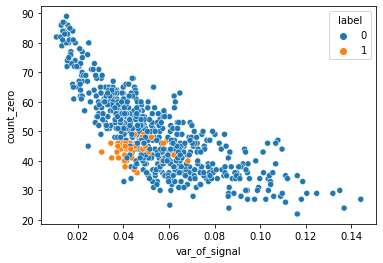

In [ ]:
# sns.scatterplot(data=tr_merge, x='var_of_signal', y='count_zero', hue='label')

In [ ]:
X = tr_merge.iloc[:, :-1]
y = tr_merge['label']

import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=7575, verbose=False, max_depth=200, max_leaves=3)

xgb_model.fit(X, y)

[10:37:40] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=200, max_leaves=3,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=7575, ...)

<AxesSubplot:xlabel='std_of_diff', ylabel='percent_of_zeroes'>

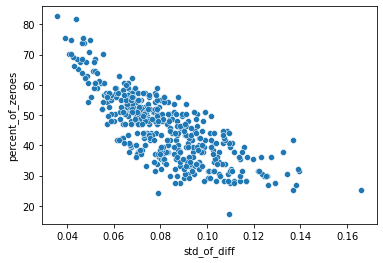

In [ ]:
path = 'https://raw.githubusercontent.com/nedokormysh/Stepik_Competitive_DS/week_2/fen/fen_test.csv'
test = pd.read_csv(path)

tr_test = test.copy()
tr_labeled_test = tr_test[['signal_id']]


tr_test_work = tr_test
tr_test_work.set_index('signal_id', inplace=True)
tr_test_work['std_of_signal'] = tr_test_work.std(axis=1)
popped_col_test_std = tr_test_work.pop('std_of_signal')

tr_test_work = abs(tr_test_work.diff(axis=1))

def foo(x, n=0.05):
  return x if x >= n else 0
  
tr_test_work = tr_test_work.applymap(foo)
tr_test_work['std_of_diff'] = tr_test_work.std(axis=1)
tr_test_work['count_zero'] = tr_test_work.eq(0).sum(axis=1)
tr_test_work['percent_of_zeroes'] = (tr_test_work['count_zero'] * 100) / 127
tr_test_work['std_of_signal'] = popped_col_test_std

# c_lst_tst = []
# for i in tr_test_work.index:
#   c = 0  
#   for j in range(len(tr_test_work.loc[i].sort_values(ascending=False)) - 1):
#     if ((tr_test_work.loc[i].sort_values(ascending=False)[j + 1]) != 0):
#       if (tr_test_work.loc[i].sort_values(ascending=False)[j + 1]) - (tr_test_work.loc[i].sort_values(ascending=False)[j] <= 0.005):
#         c += 1
#   c_lst_tst.append(c)

# tr_test_work['count_of_equal'] = c_lst_tst

# tr_test_work.reset_index(inplace=True)



tr_test_work = tr_test_work[['std_of_diff',	'count_zero',	'percent_of_zeroes',	'std_of_signal',	
                            #  'count_of_equal'
                             ]]

# tr_test_work.head()
tr_test_work.head()
sns.scatterplot(data=tr_test_work, x='std_of_diff', y='percent_of_zeroes')

In [ ]:
sub = pd.read_csv('https://raw.githubusercontent.com/nedokormysh/Stepik_Competitive_DS/week_2/fen/fen_sample_solution.csv')
sub['label'] = xgb_model.predict(tr_test_work)
# sub
sub.to_csv("try_6.csv", index=False)

In [ ]:
X = tr_merge.iloc[:, :-1]
y = tr_merge['label']


neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X, y)

sub['label'] = neigh.predict(tr_test_work)
# sub
sub.to_csv("try_8.csv", index=False)

# Prediction

In [ ]:
def runn(n=0.05):
  tr = train.copy()
  tr_labeled = tr[['signal_id', 'label']]
  tr_work = tr.drop('label', axis=1)
  tr_work.set_index('signal_id', inplace=True)
  tr_work['std_of_signal'] = tr_work.std(axis=1)
  popped_col_std = tr_work.pop('std_of_signal')
  tr_work = abs(tr_work.diff(axis=1))
  col_need = [f'p{i}' for i in range(2, 129)]

  def foo(x, n=n):
    return x if x >= n else 0
  
  tr_work = tr_work.applymap(foo)
  tr_work['std_of_diff'] = tr_work.std(axis=1)

  all_std=[]
  for i in tr_work.index:   
    std = 0
    s_lst = []
    for el in col_need:
      if tr_work.loc[i][el] != 0:
        s_lst.append(tr_work.loc[i][el])
    std = np.std(s_lst)
    all_std.append(std)

  tr_work['std_of_diff_f'] = all_std

  tr_work['count_zero'] = tr_work.eq(0).sum(axis=1) - 1
  tr_work['percent_of_zeroes'] = (tr_work['count_zero'] * 100) / 127
  tr_work['std_of_signal'] = popped_col_std

  # c_lst = []
  # for i in tr_work.index:
  #   c = 0  
  #   for j in range(len(tr_work.loc[i].sort_values(ascending=False)) - 1):
  #     if ((tr_work.loc[i].sort_values(ascending=False)[j + 1]) != 0):
  #       if (tr_work.loc[i].sort_values(ascending=False)[j + 1]) - (tr_work.loc[i].sort_values(ascending=False)[j] <= 0.005):
  #         c += 1
  #   c_lst.append(c)

  # tr_work['count_of_equal'] = c_lst


  tr_work.reset_index(inplace=True)

  tr_merge = tr_work.merge(tr_labeled, on='signal_id')
  tr_merge.set_index('signal_id', inplace=True)
  tr_merge = tr_merge[['std_of_diff', 'std_of_diff_f', 'count_zero',	'percent_of_zeroes',	'std_of_signal',	
                    #  'count_of_equal',
                     'label']]

# tr_work.head()
# tr_merge.head()

# sns.scatterplot(data=tr_merge, x='count_zero', y='count_of_equal', hue='label')
  sns.scatterplot(data=tr_merge, x='std_of_diff_f', y='percent_of_zeroes', hue='label')

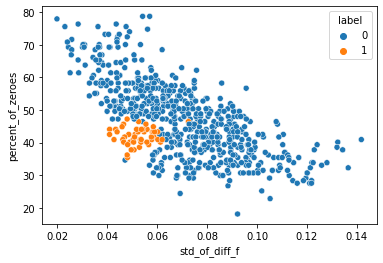

In [ ]:
runn(0.05)

<AxesSubplot:xlabel='std_of_diff_f', ylabel='percent_of_zeroes'>

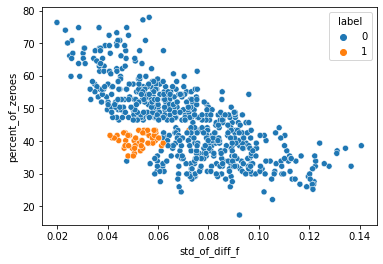

In [ ]:
tr = train.copy()
tr_labeled = tr[['signal_id', 'label']]
tr_work = tr.drop('label', axis=1)
tr_work.set_index('signal_id', inplace=True)
tr_work['std_of_signal'] = tr_work.std(axis=1)
popped_col_std = tr_work.pop('std_of_signal')
tr_work = abs(tr_work.diff(axis=1))
col_need = [f'p{i}' for i in range(2, 129)]

def foo(x, n=0.05):
  return x if x >= n else 0
  
tr_work = tr_work.applymap(foo)
tr_work['std_of_diff'] = tr_work.std(axis=1)

all_std=[]
for i in tr_work.index:   
  std = 0
  s_lst = []
  for el in col_need:
    if tr_work.loc[i][el] != 0:
      s_lst.append(tr_work.loc[i][el])
  std = np.std(s_lst)
  all_std.append(std)

tr_work['std_of_diff_f'] = all_std

tr_work['count_zero'] = tr_work.eq(0).sum(axis=1) - 1
tr_work['percent_of_zeroes'] = (tr_work['count_zero'] * 100) / 127
tr_work['std_of_signal'] = popped_col_std

c_lst = []
for i in tr_work.index:
  c = 0  
  for j in range(len(tr_work.loc[i].sort_values(ascending=False)) - 1):
    if ((tr_work.loc[i].sort_values(ascending=False)[j + 1]) != 0):
      if (tr_work.loc[i].sort_values(ascending=False)[j + 1]) - (tr_work.loc[i].sort_values(ascending=False)[j] <= 0.005):
        c += 1
  c_lst.append(c)

tr_work['count_of_equal'] = c_lst


tr_work.reset_index(inplace=True)

tr_merge = tr_work.merge(tr_labeled, on='signal_id')
tr_merge.set_index('signal_id', inplace=True)
tr_merge = tr_merge[['std_of_diff', 'std_of_diff_f', 'count_zero',	'percent_of_zeroes',	'std_of_signal',	
                     'count_of_equal',
                     'label']]

# tr_work.head()
# tr_merge.head()

# sns.scatterplot(data=tr_merge, x='count_zero', y='count_of_equal', hue='label')
sns.scatterplot(data=tr_merge, x='std_of_diff_f', y='percent_of_zeroes', hue='label')

In [ ]:
X = tr_merge.iloc[:, :-1]
y = tr_merge['label']

n = 7575

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=n)

xgb_model = xgb.XGBClassifier(random_state=n, verbose=False, max_depth=400, max_leaves=5)

xgb_model.fit(X_train, y_train)

roc_auc_score(y_true=y_test, y_score=xgb_model.predict(X_test))

[12:48:36] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.



0.9972222222222222

<AxesSubplot:xlabel='std_of_diff_f', ylabel='percent_of_zeroes'>

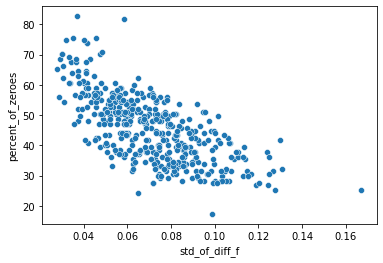

In [ ]:
tr_test = test.copy()
tr_labeled_test = tr_test[['signal_id']]


tr_test_work = tr_test
tr_test_work.set_index('signal_id', inplace=True)
tr_test_work['std_of_signal'] = tr_test_work.std(axis=1)
popped_col_test_std = tr_test_work.pop('std_of_signal')

tr_test_work = abs(tr_test_work.diff(axis=1))

def foo(x, n=0.05):
  return x if x >= n else 0
  
tr_test_work = tr_test_work.applymap(foo)
tr_test_work['std_of_diff'] = tr_test_work.std(axis=1)

all_std=[]
for i in tr_test_work.index:   
  std = 0
  s_lst = []
  for el in col_need:
    if tr_test_work.loc[i][el] != 0:
      s_lst.append(tr_test_work.loc[i][el])
  std = np.std(s_lst)
  all_std.append(std)

tr_test_work['std_of_diff_f'] = all_std

tr_test_work['count_zero'] = tr_test_work.eq(0).sum(axis=1)
tr_test_work['percent_of_zeroes'] = (tr_test_work['count_zero'] * 100) / 127
tr_test_work['std_of_signal'] = popped_col_test_std

c_lst_tst = []
for i in tr_test_work.index:
  c = 0  
  for j in range(len(tr_test_work.loc[i].sort_values(ascending=False)) - 1):
    if ((tr_test_work.loc[i].sort_values(ascending=False)[j + 1]) != 0):
      if (tr_test_work.loc[i].sort_values(ascending=False)[j + 1]) - (tr_test_work.loc[i].sort_values(ascending=False)[j] <= 0.005):
        c += 1
  c_lst_tst.append(c)

tr_test_work['count_of_equal'] = c_lst_tst

# tr_test_work.reset_index(inplace=True)



tr_test_work = tr_test_work[['std_of_diff','std_of_diff_f',	'count_zero',	'percent_of_zeroes',	'std_of_signal',	
                             'count_of_equal'
                             ]]

# tr_test_work.head()
tr_test_work.head()
sns.scatterplot(data=tr_test_work, x='std_of_diff_f', y='percent_of_zeroes')

In [ ]:
X = tr_merge.iloc[:, :-1]
y = tr_merge['label']

xgb_model.fit(X, y)

sub['label'] = xgb_model.predict(tr_test_work)
# sub
sub.to_csv("try_9.csv", index=False)

[12:55:37] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.



In [ ]:
sub

,signal_id,label
0,0,0
1,1,0
2,8,1
3,9,0
4,10,0
...,...,...
427,1216,0
428,1217,0
429,1223,0
430,1224,0


# lst_fight

## Train

In [ ]:
path = 'https://raw.githubusercontent.com/nedokormysh/Stepik_Competitive_DS/week_2/fen/fen_train.csv'
train = pd.read_csv(path)
path = 'https://raw.githubusercontent.com/nedokormysh/Stepik_Competitive_DS/week_2/fen/fen_test.csv'
test = pd.read_csv(path)

<AxesSubplot:xlabel='np_std_of_diff', ylabel='count_zero'>

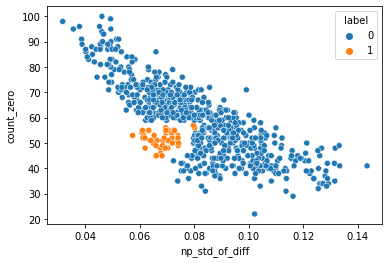

In [ ]:
tr = train.copy()
tr_labeled = tr[['signal_id', 'label']]
tr_work = tr.drop('label', axis=1)
tr_work.set_index('signal_id', inplace=True)
tr_work['std_of_signal'] = tr_work.std(axis=1)
popped_col_std = tr_work.pop('std_of_signal')
tr_work['np_std_of_sgnl'] = tr_work.apply(lambda row: np.std(row), axis=1)
pop_col_np_std_sgnl = tr_work.pop('np_std_of_sgnl')        #
# tr_work['std_of_signal'] = popped_col_std
# popped_col_std = tr_work.pop('std_of_signal')
tr_work = abs(tr_work.diff(axis=1))
tr_work['mean_of_diff'] = tr_work.mean(axis=1)
pop_col_mean_of_diff = tr_work.pop('mean_of_diff') 
tr_work['std_of_diff'] = tr_work.std(axis=1)
pop_col_std_of_diff = tr_work.pop('std_of_diff')

# tr_work['std_of_diff_not_zero_before'] = tr_work.apply(lambda row: np.std([row[el] for el in list([np.where(row.values != 0)][0][0])]), axis=1)
# pop_col_std_of_diff_f_not_zero_before = tr_work.pop('std_of_diff_not_zero_before')

tr_work = tr_work.applymap(lambda x: x if x >= .0505 else 0)

tr_work['np_std_of_diff'] = tr_work.apply(lambda row: np.std(row), axis=1)
pop_col_np_std_diff = tr_work.pop('np_std_of_diff')               #

tr_work['std_of_diff_not_zero'] = tr_work.apply(lambda row: np.std([row[el] for el in list([np.where(row.values != 0)][0][0])]), axis=1)
pop_col_std_of_diff_f_not_zero = tr_work.pop('std_of_diff_not_zero')             #

tr_work['count_zero'] = tr_work.eq(0).sum(axis=1) - 1
tr_work['percent_of_zeroes'] = (tr_work['count_zero'] * 100) / 127
pop_col_count_zero = tr_work.pop('count_zero')
pop_col_percent_of_zeroes = tr_work.pop('percent_of_zeroes') 


def foo_not_equal_counter(row):
  lst = row.sort_values(ascending=False)
  c = 0
  for i in range(len(lst) - 1):  
    if (lst[i] != 0) and (abs(lst[i + 1] - lst[i]) < 0.004):
      c += 1
  return c

tr_work['std_of_diff'] = pop_col_std_of_diff 
tr_work['mean_of_diff'] = pop_col_mean_of_diff
tr_work['std_of_signal'] = popped_col_std 
tr_work['count_of_equal'] = tr_work.apply(foo_not_equal_counter, axis=1)
tr_work['np_std_of_sgnl'] = pop_col_np_std_sgnl
tr_work['np_std_of_diff'] = pop_col_np_std_diff
# tr_work['std_of_diff_not_zero_before'] = pop_col_std_of_diff_f_not_zero_before 
tr_work['std_of_diff_not_zero'] = pop_col_std_of_diff_f_not_zero
tr_work['count_zero'] = pop_col_count_zero
tr_work['percent_of_zeroes'] = pop_col_percent_of_zeroes 
tr_work.reset_index(inplace=True)

tr_merge = tr_work.merge(tr_labeled, on='signal_id')
tr_merge.set_index('signal_id', inplace=True)
tr_merge = tr_merge[['std_of_diff',
                     'mean_of_diff',
                     'std_of_signal',
                     'count_of_equal',
                     'np_std_of_sgnl',
                     'np_std_of_diff',
                    #  'std_of_diff_not_zero_before',
                     'std_of_diff_not_zero',
                     'count_zero',
                     'percent_of_zeroes', 
                     'label']]

tr_work.head()
# # tr_merge[tr_merge['label'] == 1]

sns.scatterplot(data=tr_merge, x='np_std_of_diff', y='count_zero', hue='label')
# # sns.scatterplot(data=tr_merge, x='count_of_equal', y='count_zero', hue='label')

In [ ]:
X = tr_merge.iloc[:, :-1]
y = tr_merge['label']

n = 7575

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=n)

xgb_model = xgb.XGBClassifier(random_state=n, verbose=False, max_depth=400, max_leaves=5)

xgb_model.fit(X_train, y_train)

roc_auc_score(y_true=y_test, y_score=xgb_model.predict(X_test)), accuracy_score(y_true=y_test, y_pred=xgb_model.predict(X_test))

[18:05:20] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.



(1.0, 1.0)

In [ ]:
!pip install catboost -q

In [ ]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(max_depth=3, #max_leaves=5
      )

clf.fit(X_train, y_train, 
          eval_set=(X_train, y_train),
          verbose=False, plot=False)
   

roc_auc_score(y_true=y_test, y_score=clf.predict(X_test)), accuracy_score(y_true=y_test, y_pred=xgb_model.predict(X_test))

(1.0, 1.0)

In [ ]:
# list([np.where(tr_work.loc[3].values != 0)][0][0])

In [ ]:
# [tr_work.loc[3][el] for el in list([np.where(tr_work.loc[3].values != 0)][0][0])]

In [ ]:
# tr_work.loc[3]

In [ ]:
# sns.scatterplot(data=tr_merge, x='count_of_equal', y='count_zero', hue='label')

In [ ]:
# tr_merge

In [ ]:
# list(tr_work.loc[3].sort_values(ascending=False))

In [ ]:
[0.3007543, 0.27749206, 0.27273970000000003, 0.25127683, 0.23817537, 0.23194990000000001,
 0.22397905, 0.21766646, 0.21263794999999996, 0.20294393, 0.19339717, 0.1933645,
 0.19102728000000002, 0.1888965, 0.184518, 0.18018055, 0.1751607, 0.16477247,
 0.16387583, 0.16131844, 0.158133, 0.15221400000000002, 0.1499425, 0.1498166,
 0.14795209599999998, 0.13709992, 0.12677084, 0.12316220000000001, 0.11768069,
 0.1121638, 0.10918426999999999, 0.10870708999999999, 0.10820766999999998,
 0.10002489999999997, 0.09818779999999999, 0.09761821, 0.09591535, 0.09338946,
 0.0908879, 0.08849857, 0.08525989999999999, 0.08447129999999997,
 0.07965739999999999, 0.07929209000000001, 0.07818960000000003, 0.07261709999999999,
 0.06722778, 0.0668567, 0.06355968, 0.062493500000000035, 0.062460760000000004,
 0.0622357, 0.06185300000000002, 0.060518366000000004, 0.05708350000000001,
 0.056668000000000024, 0.05386352999999999]

In [ ]:
# lst = tr_work.loc[3].sort_values(ascending=False)
# c = 0
# for i in range(len(lst) - 1):
#   # print(lst[i])
#   # print(lst[i + 1] - lst[i])
#   if (lst[i] != 0) and (abs(lst[i + 1] - lst[i]) < 0.001):
#     c += 1
# c

In [ ]:
#  (0.27749206 - 0.27273970000000003) < 0.005

In [ ]:
# list([np.where(tr_work.loc[3].values != 0)][0][0])

In [ ]:
# len([np.where(tr_work.loc[3] != 0)])

In [ ]:
# lst = []
# for i in range(len(list([np.where(tr_work.loc[3].values != 0)][0][0]))):
#   # print(i)
#   print(tr_work.loc[3][i])
#   # lst.append(tr_work.loc[3][i])

# # # tr_work.loc[3]
# # lst

In [ ]:
# lst = []
# for el in list([np.where(tr_work.loc[3].values != 0)][0][0]):
#   # print(tr_work.loc[3][el])
#   lst.append(tr_work.loc[3][el])

# np.std(lst)

## Test

<AxesSubplot:xlabel='np_std_of_diff', ylabel='count_zero'>

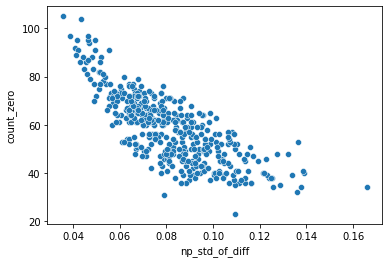

In [ ]:
tr_test = test.copy()
tr_labeled = tr[['signal_id']]

tr_test.set_index('signal_id', inplace=True)
tr_test_work = tr_test.copy()
tr_test_work['std_of_signal'] = tr_test_work.std(axis=1)
popped_col_std = tr_test_work.pop('std_of_signal')
tr_test_work['np_std_of_sgnl'] = tr_test_work.apply(lambda row: np.std(row), axis=1)
pop_col_np_std_sgnl = tr_test_work.pop('np_std_of_sgnl')        #


tr_test_work = abs(tr_test_work.diff(axis=1))
tr_test_work['mean_of_diff'] = tr_test_work.mean(axis=1)
pop_col_mean_of_diff = tr_test_work.pop('mean_of_diff') 
tr_test_work['std_of_diff'] = tr_test_work.std(axis=1)
pop_col_std_of_diff = tr_test_work.pop('std_of_diff')

tr_test_work = tr_test_work.applymap(lambda x: x if x >= .0505 else 0)

tr_test_work['np_std_of_diff'] = tr_test_work.apply(lambda row: np.std(row), axis=1)
pop_col_np_std_diff = tr_test_work.pop('np_std_of_diff')               #

tr_test_work['std_of_diff_not_zero'] = tr_test_work.apply(lambda row: np.std([row[el] for el in list([np.where(row.values != 0)][0][0])]), axis=1)
pop_col_std_of_diff_f_not_zero = tr_test_work.pop('std_of_diff_not_zero')             #

tr_test_work['count_zero'] = tr_test_work.eq(0).sum(axis=1) #- 1
tr_test_work['percent_of_zeroes'] = (tr_test_work['count_zero'] * 100) / 127
pop_col_count_zero = tr_test_work.pop('count_zero')
pop_col_percent_of_zeroes = tr_test_work.pop('percent_of_zeroes') 

def foo_not_equal_counter(row):
  lst = row.sort_values(ascending=False)
  c = 0
  for i in range(len(lst) - 1):  
    if (lst[i] != 0) and (abs(lst[i + 1] - lst[i]) < 0.004):
      c += 1
  return c
# tr_work
tr_test_work['std_of_diff'] = pop_col_std_of_diff 
tr_test_work['mean_of_diff'] = pop_col_mean_of_diff
tr_test_work['std_of_signal'] = popped_col_std 
tr_test_work['count_of_equal'] = tr_test_work.apply(foo_not_equal_counter, axis=1)
tr_test_work['np_std_of_sgnl'] = pop_col_np_std_sgnl
tr_test_work['np_std_of_diff'] = pop_col_np_std_diff
# # tr_test_work['std_of_diff_not_zero_before'] = pop_col_std_of_diff_f_not_zero_before 
tr_test_work['std_of_diff_not_zero'] = pop_col_std_of_diff_f_not_zero
tr_test_work['count_zero'] = pop_col_count_zero
tr_test_work['percent_of_zeroes'] = pop_col_percent_of_zeroes 

tr_test_work = tr_test_work[['std_of_diff',
                     'mean_of_diff',
                     'std_of_signal',
                     'count_of_equal',
                     'np_std_of_sgnl',
                     'np_std_of_diff',
                    #  'std_of_diff_not_zero_before',
                     'std_of_diff_not_zero',
                     'count_zero',
                     'percent_of_zeroes', 
                     ]]


# tr_test_work
sns.scatterplot(data=tr_test_work, x='np_std_of_diff', y='count_zero')

## Pred

In [ ]:
X = tr_merge.iloc[:, :-1]
y = tr_merge['label']

xgb_model.fit(X, y)

sub['label'] = xgb_model.predict(tr_test_work)
# sub
sub.to_csv("try_15.csv", index=False)

[18:05:37] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.



In [ ]:
X = tr_merge.iloc[:, :-1]
y = tr_merge['label']

clf.fit(X, y, verbose=False)

sub['label'] = clf.predict(tr_test_work)
# sub
sub.to_csv("try_16.csv", index=False)

# 3.2.12

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path = 'https://stepik.org/media/attachments/lesson/779913/sample_submit.csv'
sample_submission = pd.read_csv(path)
sample_submission.head()

,car_id,target_class
0,I-1144396V,gear_stick
1,q13819346b,wheel_shake
2,O-1088987d,electro_bug
3,A-2091756g,wheel_shake
4,k15500468M,engine_ignition


(2337, 10)


,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
1152,l-1645080P,Nissan Qashqai,standart,petrol,5.26,2013,42757,2015,1757.79,electro_bug
12,I49569137x,Kia Rio,economy,petrol,3.92,2015,73646,2018,3224.24,engine_check
1768,G13384578X,Hyundai Solaris,economy,petrol,3.38,2015,76597,2022,3150.19,gear_stick


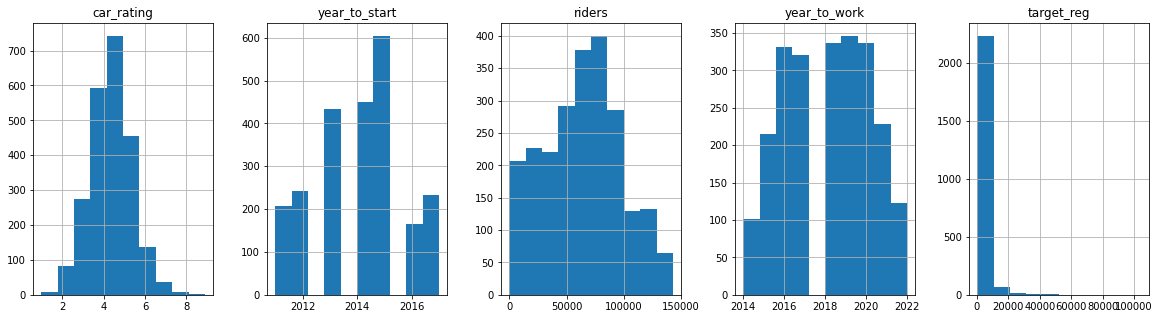

In [ ]:
path = 'https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_train.csv'
train = pd.read_csv(path)
print(train.shape)
train.hist(figsize=(20, 5), layout = (-1, 5))
train.sample(3)

In [ ]:
path = 'https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_test.csv'
test = pd.read_csv(path)
print(test.shape)
test.sample(3)     

(1913, 8)


,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work
49,b-9697936F,Renault Sandero,standart,petrol,4.32,2011,3171,2018
1698,V21379614l,Hyundai Solaris,economy,petrol,3.82,2015,80264,2020
450,A-6746020J,Smart ForFour,economy,petrol,4.50,2013,40778,2016


Классифицируем признаки

In [ ]:
features2drop = ['car_id'] 
targets = ['target_class', 'target_reg']  
cat_features = ['car_type', 'fuel_type', 'model'] 

filtered_features = [i for i in train.columns if (i not in targets and i not in features2drop)]
num_features = [i for i in filtered_features if i not in cat_features]


print('cat_features :', len(cat_features), cat_features)
print('num_features :', len(num_features), num_features)
print('targets', targets)

cat_features : 3 ['car_type', 'fuel_type', 'model']
num_features : 4 ['car_rating', 'year_to_start', 'riders', 'year_to_work']
targets ['target_class', 'target_reg']


In [ ]:
!pip install catboost -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #, mean_squared_error

Добавляем rides

In [ ]:
path = "https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/rides_info.csv"
rides = pd.read_csv(path)  # Данные по поездкам
# rides.hist(figsize=(15, 5), layout=(-1, 3))
rides.sample(3)

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
492461,L18088642L,i20932780E,s1i,2020-01-22,3.58,85,758,51,84.874073,0,3444.895107,0,-2.544360,-6.030
343545,B44832235V,Y18898842Z,r1K,2020-02-06,0.25,72,1147,47,106.000000,1,2944.099342,0,-1.919887,7.246
365213,z14621863c,a-1426275y,R1r,2020-03-26,6.80,25,346,46,54.000000,1,361.802976,0,1.241588,11.194


Добавим столбец стоимость поездки с учётом рейтинга и скорости. И несколько новых фич по deviation_duration

In [ ]:
def final_ride_cost_eq(row):
  if (row['rating'] > 6) & (row['speed_max'] < 120):
    res = row['ride_cost'] - row['ride_cost'] * 0.05
  else:
    res = row['ride_cost'] + row['ride_cost'] * 0.05

  return int(res)

rides['final_ride_cost'] = rides.apply(final_ride_cost_eq, axis=1)

# Усредняем значений за один день и выбрасываем дубли дат для каждой машины
cols = ["car_id", "ride_date"]
rides["value"] = rides.groupby(cols, as_index=False)["deviation_normal"].transform("mean")
rides = rides.drop_duplicates(subset=["car_id", "ride_date"]).copy()

# Считаем измененя для каждого дня и зануляем все, что меньше 5
rides["diff_value"] = rides.groupby("car_id", as_index=False)["value"].transform(pd.Series.diff)
rides["diff_value"] = rides["diff_value"].apply(lambda x: x if x >= 5 else 0)

# # Группировкой получаем максмальное изменение и его позицию 
# foo = lambda x: np.argmax(x)
# rides = rides.groupby("car_id", as_index=False).agg(
#     max_diff_value = ("diff_value", "max"),
#     max_diff_value_position = ("diff_value", lambda x: np.argmax(x)),
# )

# rides.head()

In [ ]:
rides.head()

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal,final_ride_cost,value,diff_value
0,o52317055h,A-1049127W,b1v,2020-01-01,4.95,21,268,36,113.548538,0,514.246920,0,1.115260,2.909,281,3.521,0.0
2,v88009926E,A-1049127W,g1p,2020-01-02,6.01,20,315,61,81.959675,0,1276.328206,0,2.599112,2.461,299,1.685,0.0
4,W17067612E,A-1049127W,X1b,2020-01-03,1.21,56,554,38,90.000000,1,1729.143367,0,2.716550,-1.822,581,-2.632,0.0
6,W11562554A,A-1049127W,A1g,2020-01-04,5.78,30,324,48,61.000000,0,1314.257355,0,1.464346,-6.004,340,-6.239,0.0
8,y62286141d,A-1049127W,h1a,2020-01-05,0.12,64,893,38,114.000000,1,2022.125012,0,-0.155147,-5.123,937,-3.601,0.0


In [ ]:
f = lambda x: x.nunique()
n_uniq_func = lambda x: x.nunique()
second_max_func = lambda x: sorted(x)[-2]
min_max_func = lambda x: min(x) / max(x)
mode_func = lambda x:  x.mode()[0]

def more_40(x):
  count = 0
  for el in x:
    if el > 40:
      count += 1
  return count

def sum_more_40(x):
  return sum([el for el in x if el > 40])

rides_df_gr = rides.groupby('car_id', as_index=False).agg(mean_rating = ('speed_avg', 'mean'),
                                                   distance_sum = ('distance', 'sum'),
                                                   rating_min = ('rating', 'min'),
                                                   rating_mean = ('rating', 'mean'), # средний рейтинг
                                                   rating_max = ('rating', 'max'), # max rating
                                                   speed_max = ('speed_max', 'max'),
                                                   user_ride_quality_median = ('user_ride_quality', 'median'),  
                                                   deviation_normal_count = ('deviation_normal', 'count'),
                                                   user_uniq = ('user_id', f),
                                                   ride_counts = ('ride_id', 'count'), # count of rides                                                   
                                                   mean_ride_cost = ('ride_cost', 'mean'), # средняя стоимость поездок
                                                   ride_cost_std = ('ride_cost', 'std'), # cтандартное отклонение стоимостей поездок (ride_cost)
                                                   final_ride_cost_mean = ('final_ride_cost', 'mean'), # cost с учётом рейтига и скорости поездок
                                                   stop_times_count = ('stop_times', n_uniq_func), # количество остановок для автомобиля
                                                   second_speed_max = ('speed_max', second_max_func), # вторая максимальная скорость автомобиля
                                                   min_max_rating_ratio = ('rating', min_max_func), # отношение минимального и максимального значения рейтинга
                                                   stop_times_mode = ('stop_times', mode_func), # самое популярное значение числа остановок (другим словами - мода)
                                                   rides_more_40 = ('ride_duration', more_40), # количество значений ride_duration, которое больше 40 для каждой машины (car_id)
                                                   max_diff_value = ("diff_value", "max"),
                                                   max_diff_value_position = ("diff_value", lambda x: np.argmax(x)),

                                                   )


rides_df_gr.head(2)

,car_id,mean_rating,distance_sum,rating_min,rating_mean,rating_max,speed_max,user_ride_quality_median,deviation_normal_count,user_uniq,...,mean_ride_cost,ride_cost_std,final_ride_cost_mean,stop_times_count,second_speed_max,min_max_rating_ratio,stop_times_mode,rides_more_40,max_diff_value,max_diff_value_position
0,A-1049127W,51.956522,6.359321e+06,0.1,4.678587,9.53,179.729652,-0.289412,92,91,...,13671.923913,57503.092246,14336.576087,4,176.253340,0.010493,0,47,18.8600,52
1,A-1079539w,51.010870,8.992062e+06,0.1,4.365870,9.31,176.744497,1.892475,92,92,...,22891.695652,92743.080174,23249.163043,5,175.779861,0.010741,0,58,7.1095,67


Добавляем фичи из райдс в трейн и тест

In [ ]:
# rides_df_gr.columns

In [ ]:
# train.merge(rides_df_gr, on = 'car_id', how = 'left')

In [ ]:
def add_features(df):
    
    if 'mean_rating' not in df.columns:
        return df.merge(rides_df_gr, on = 'car_id', how = 'left')    
    return df
    
    
train = add_features(train)
test = add_features(test)

In [ ]:
# train.columns

Для категориальных признаков делаем ohe

In [ ]:
# cat_features = ["car_type", "fuel_type", "model"]
# train = pd.get_dummies(train, columns=cat_features)
# test = pd.get_dummies(test, columns=cat_features)

train.head(4)

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,...,user_uniq,ride_counts,mean_ride_cost,ride_cost_std,final_ride_cost_mean,stop_times_count,second_speed_max,min_max_rating_ratio,stop_times_mode,rides_more_40
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,9492.96,another_bug,...,170,174,20106.873563,77483.240255,20896.005747,20,NaN,0.010593,0,116
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,2656.23,electro_bug,...,174,174,26813.614943,98135.975960,27360.356322,4,171.972719,0.000000,0,107
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,1526.11,gear_stick,...,173,174,23987.793103,88190.939557,24192.304598,4,99.737658,0.010309,0,78
3,u29695600e,Mercedes-Benz GLC,business,petrol,4.04,2011,1263,2020,1338.00,engine_fuel,...,170,174,37839.086207,181004.405078,39711.816092,4,161.916016,0.010000,1,104


In [ ]:
train.columns

Index(['car_id', 'model', 'car_type', 'fuel_type', 'car_rating',
       'year_to_start', 'riders', 'year_to_work', 'target_reg', 'target_class',
       'mean_rating', 'distance_sum', 'rating_min', 'rating_mean',
       'rating_max', 'speed_max', 'user_ride_quality_median',
       'deviation_normal_count', 'user_uniq', 'ride_counts', 'mean_ride_cost',
       'ride_cost_std', 'final_ride_cost_mean', 'stop_times_count',
       'second_speed_max', 'min_max_rating_ratio', 'stop_times_mode',
       'rides_more_40'],
      dtype='object')

In [ ]:
features2drop = ['car_id'] 
targets = ['target_class', 'target_reg']  
cat_features = ['car_type', 'fuel_type', 'model'] 

filtered_features = [i for i in train.columns if (i not in targets and i not in features2drop)]
num_features = [i for i in filtered_features if i not in cat_features]


print('cat_features :', len(cat_features), cat_features)
print('num_features :', len(num_features), num_features)
print('targets', targets)

cat_features : 3 ['car_type', 'fuel_type', 'model']
num_features : 24 ['car_rating', 'year_to_start', 'riders', 'year_to_work', 'mean_rating', 'distance_sum', 'rating_min', 'rating_mean', 'rating_max', 'speed_max', 'user_ride_quality_median', 'deviation_normal_count', 'user_uniq', 'ride_counts', 'mean_ride_cost', 'ride_cost_std', 'final_ride_cost_mean', 'stop_times_count', 'second_speed_max', 'min_max_rating_ratio', 'stop_times_mode', 'rides_more_40', 'max_diff_value', 'max_diff_value_position']
targets ['target_class', 'target_reg']


In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

X = train[filtered_features].drop(targets, axis=1, errors='ignore')
y = train['target_class']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_splits = 5
clfs = []
# scores = []
acc_scores = []

kf = KFold(n_splits=n_splits, shuffle=True, random_state=7575)
for num, (train_index, test_index) in enumerate(kf.split(X)):

  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  clf = CatBoostClassifier(
      cat_features=cat_features
      )
  clfs.append(clf)

  clf.fit(X_train, y_train, 
          eval_set=(X_test, y_test),
          verbose=False, plot=False)
   

  y_pred = clf.predict(X_test)  
  
  acc_score = accuracy_score(y_test.values, y_pred)

  print(f'fold: {num} acc: {acc_score}')
  # score = np.mean(np.array(y_pred == y_test.values))
  # scores.append(score)
  # print(f"fold: {num} acc: {score}")
  acc_scores.append(acc_score)

assert len(clfs) == n_splits  # Проверка, что все ок

# Считаем среднее и дисперсию по всем фолдам
print("mean accuracy score --", np.mean(acc_score, dtype="float16"), np.std(acc_score).round(4))

fold: 0 acc: 0.8803418803418803
fold: 1 acc: 0.8867521367521367
fold: 2 acc: 0.9036402569593148
fold: 3 acc: 0.8993576017130621
fold: 4 acc: 0.8886509635974305
mean accuracy score -- 0.8887 0.0


In [ ]:
path = "https://stepik.org/media/attachments/lesson/779913/sample_submission.csv"
sub_ct = pd.read_csv(path)

# массив для записи финального прогноза size*n_class
y_pred = np.zeros((sub_ct.shape[0], train[targets].nunique()[0]))

# Используем все модели из списка clfs для инференса
for n, clf in enumerate(clfs):
    y_pred += clf.predict_proba(test[filtered_features])

f = lambda x: clf.classes_[x]

sub_ct['target_class'] = list(map(f, y_pred.argmax(axis=1)))
sub_ct['car_id'] = test['car_id']

sub_ct.to_csv('3_2_12_try_1.csv', index=False)

In [ ]:
sub_ct

,car_id,target_class
0,P17494612l,engine_overheat
1,N-1530212S,electro_bug
2,B-1154399t,break_bug
3,F12725233R,gear_stick
4,l-1139189J,electro_bug
...,...,...
1908,x13640960Q,engine_check
1909,Z-2276652N,engine_overheat
1910,F-2165841B,gear_stick
1911,x-1331529J,engine_check
